In [72]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torchvision.utils import make_grid

plt.style.use('seaborn')
%matplotlib inline

In [44]:
data_dir = './data/train/*'
extensions = set()
img_sizes = dict()

for label_path in glob.glob(data_dir):
    label = label_path.split('/')[-1]
    img_sizes[label] = []
    print('Processing', label)
    
    for img_path in glob.glob(f'{label_path}/*'):
        extensions.add(img_path.split('.')[-1])
        try:
            img_tensor = read_image(img_path)
            img_sizes[label].append((img_tensor.shape[1], img_tensor.shape[2]))
        except Exception as e:
            print(str(e), img_path)

print('Available extensions:', ' '.join(e for e in extensions))

Processing Sandwich
Processing Donut
Processing HotDog
Unsupported image file. Only jpeg and png are currently supported. ./data/train/HotDog/Hot Dog - Train (59).jpg
Processing Burger
Processing Pizza
Available extensions: jpg jpeg png


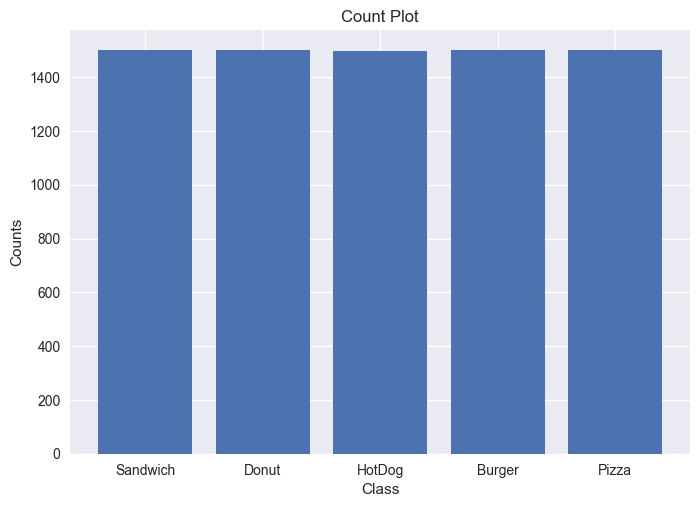

In [82]:
class_names = []
class_distributions = []
for label, sizes in img_sizes.items():
    class_names.append(label)
    class_distributions.append(len(sizes))

plt.bar(class_names, class_distributions)
plt.ylabel('Counts')
plt.xlabel('Class')
plt.title('Count Plot');

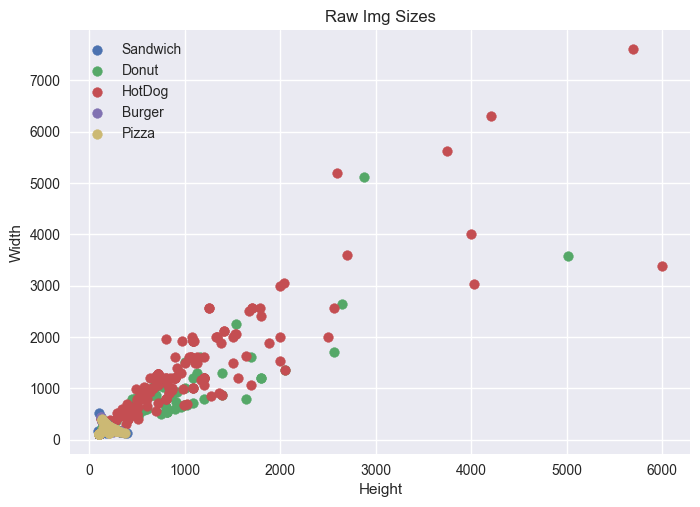

In [54]:
for label in img_sizes.keys():
    xs, ys = [], []
    for xy in img_sizes[label]:
        xs.append(xy[0])
        ys.append(xy[1])
    
    plt.xlabel('Height')
    plt.ylabel('Width')
    plt.title('Raw Img Sizes')
    plt.scatter(xs, ys, label=label)
    plt.legend();

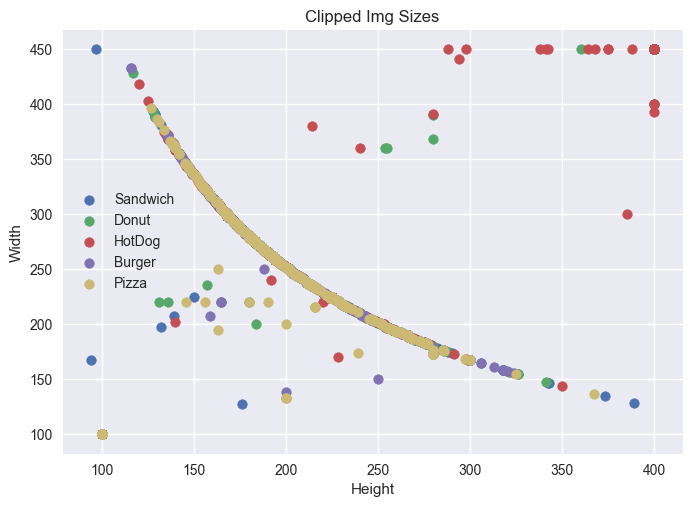

In [84]:
max_height, max_width = (400, 450)

for label in img_sizes.keys():
    xs, ys = [], []
    for xy in img_sizes[label]:
        xs.append(min(max_height, xy[0]))
        ys.append(min(max_width, xy[1]))

    plt.xlabel('Height')
    plt.ylabel('Width')
    plt.title('Clipped Img Sizes')
    plt.scatter(xs, ys, label=label)
    plt.legend();

Overall Mean Width: 202.95
Overall Mean Height: 243.94
Optimal Image Size: 223.44


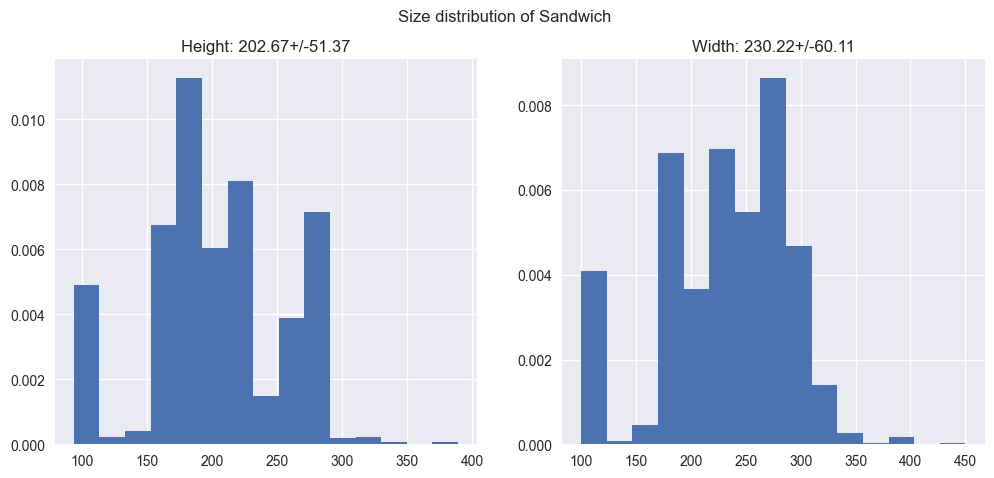

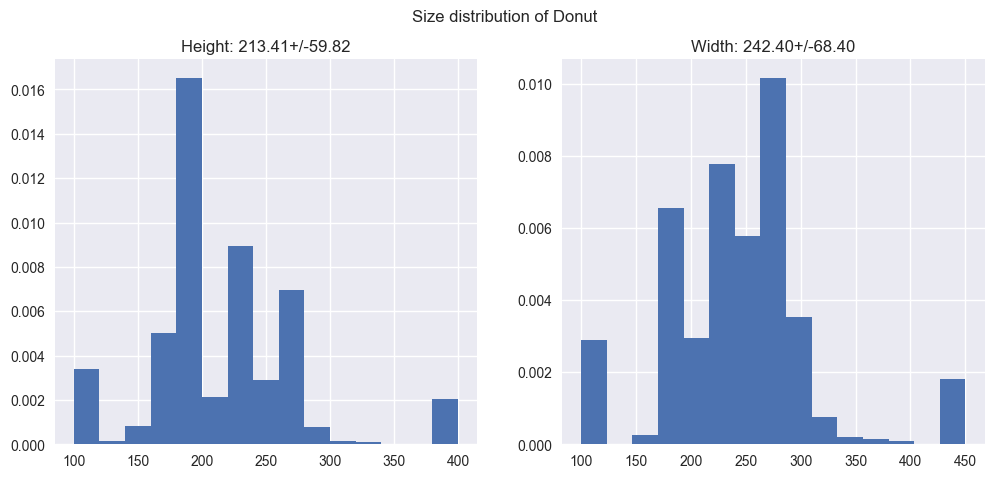

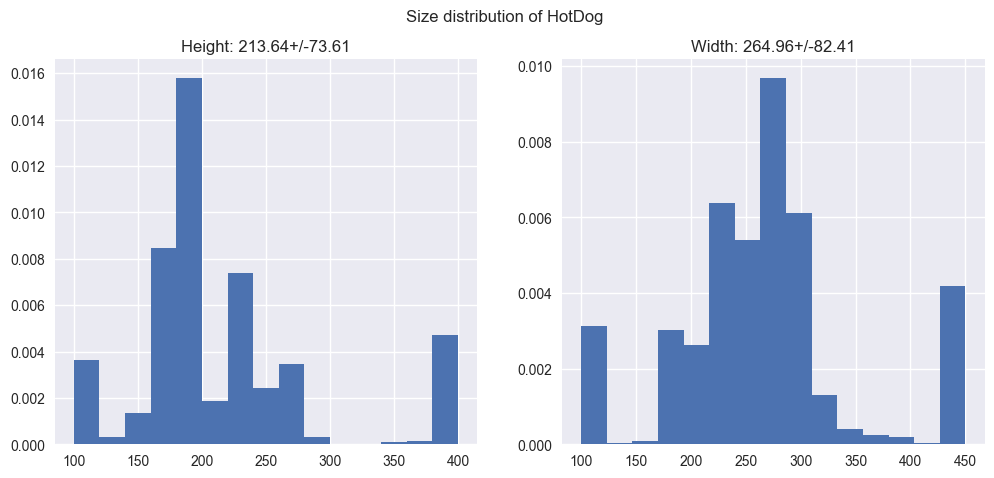

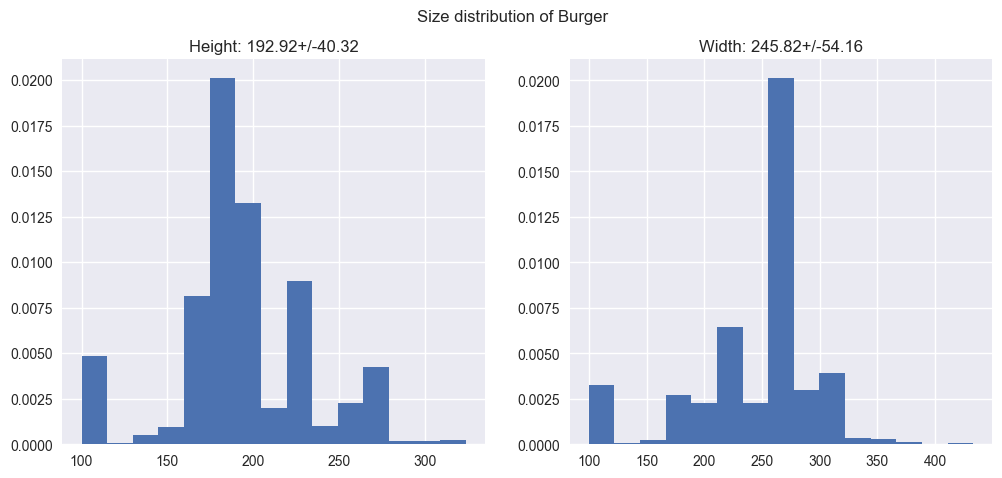

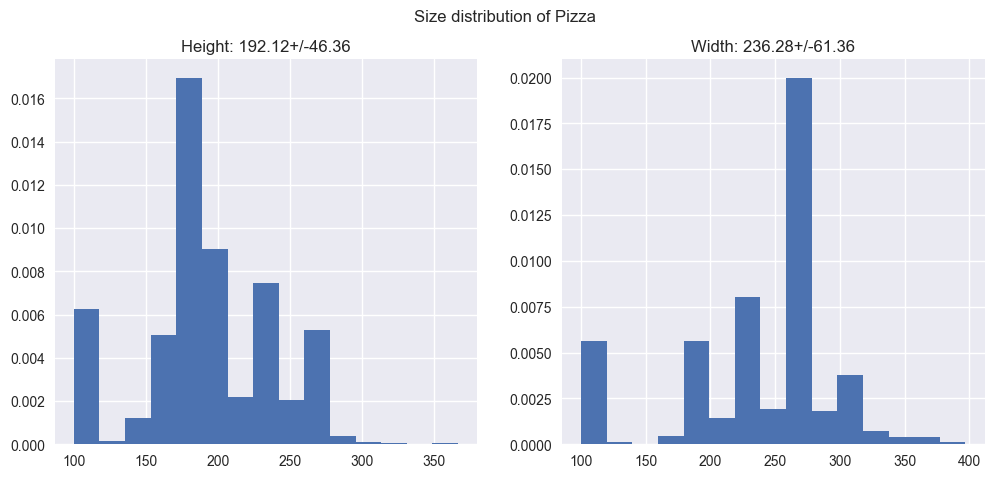

In [93]:
max_height, max_width = (400, 450)
widths, heights = [], []

for label in img_sizes.keys():
    xs, ys = [], []
    for xy in img_sizes[label]:
        xs.append(min(max_height, xy[0]))
        ys.append(min(max_width, xy[1]))
        
    mean_width = np.mean(xs)
    mean_height = np.mean(ys)
    widths.append(mean_width)
    heights.append(mean_height)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.hist(xs, bins=15, density=True)
    plt.title(f'Height: {mean_width:.2f}+/-{np.std(xs):.2f}')
    plt.subplot(122)
    plt.hist(ys, bins=15, density=True)
    plt.title(f'Width: {mean_height:.2f}+/-{np.std(ys):.2f}')
    plt.suptitle(f'Size distribution of {label}')
    
print(f'Overall Mean Width: {np.mean(widths):.2f}')
print(f'Overall Mean Height: {np.mean(heights):.2f}')
print(f'Optimal Image Size: {np.mean([np.mean(widths), np.mean(heights)]):.2f}')